In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [2]:
df_island <- read_csv("Islander_data.csv")

Rows: 198 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): first_name, last_name, Happy_Sad_group, Drug
dbl (5): age, Dosage, Mem_Score_Before, Mem_Score_After, Diff

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
df_island %>% head()

first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After,Diff
<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>
Bastian,Carrasco,25,H,1,A,63.5,61.2,-2.3
Evan,Carrasco,52,S,1,A,41.6,40.7,-0.9
Florencia,Carrasco,29,H,1,A,59.7,55.1,-4.6
Holly,Carrasco,50,S,1,A,51.7,51.2,-0.5
Justin,Carrasco,52,H,1,A,47.0,47.1,0.1
Liam,Carrasco,37,S,1,A,66.4,58.1,-8.3


In [4]:
island_model <- lm(Diff ~ as.factor(Drug), data = df_island) 

In [6]:
summary(aov(island_model))

                 Df Sum Sq Mean Sq F value   Pr(>F)    
as.factor(Drug)   2   4305  2152.4   22.71 1.36e-09 ***
Residuals       195  18481    94.8                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

In [26]:
overall_mean <- mean(df_island$Diff)
df_summary <- df_island %>% group_by(Drug) %>% summarise("Mean(Diff)" = mean(Diff), "Mean(Age)" = mean(age), "SSE" = sum((Diff - mean(Diff))^2), n = n(), "SSTreat" = (mean(Diff) - overall_mean)^2)

In [29]:
df_summary <- df_summary %>% mutate("SSTreat*n" = SSTreat * n)

In [31]:
df_summary %>% select(SSE, "SSTreat*n") %>% sum()

[1] 22785.31

In [32]:
df_summary

Drug,Mean(Diff),Mean(Age),SSE,n,SSTreat,SSTreat*n
<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
A,9.4701493,40.10448,11594.000,67,42.45309,2844.3572
S,-0.1712121,37.42424,3656.175,66,9.77036,644.8438
T,-0.5876923,41.07692,3230.350,65,12.54745,815.5841


In [25]:
mean(df_island$Diff)

[1] 2.954545

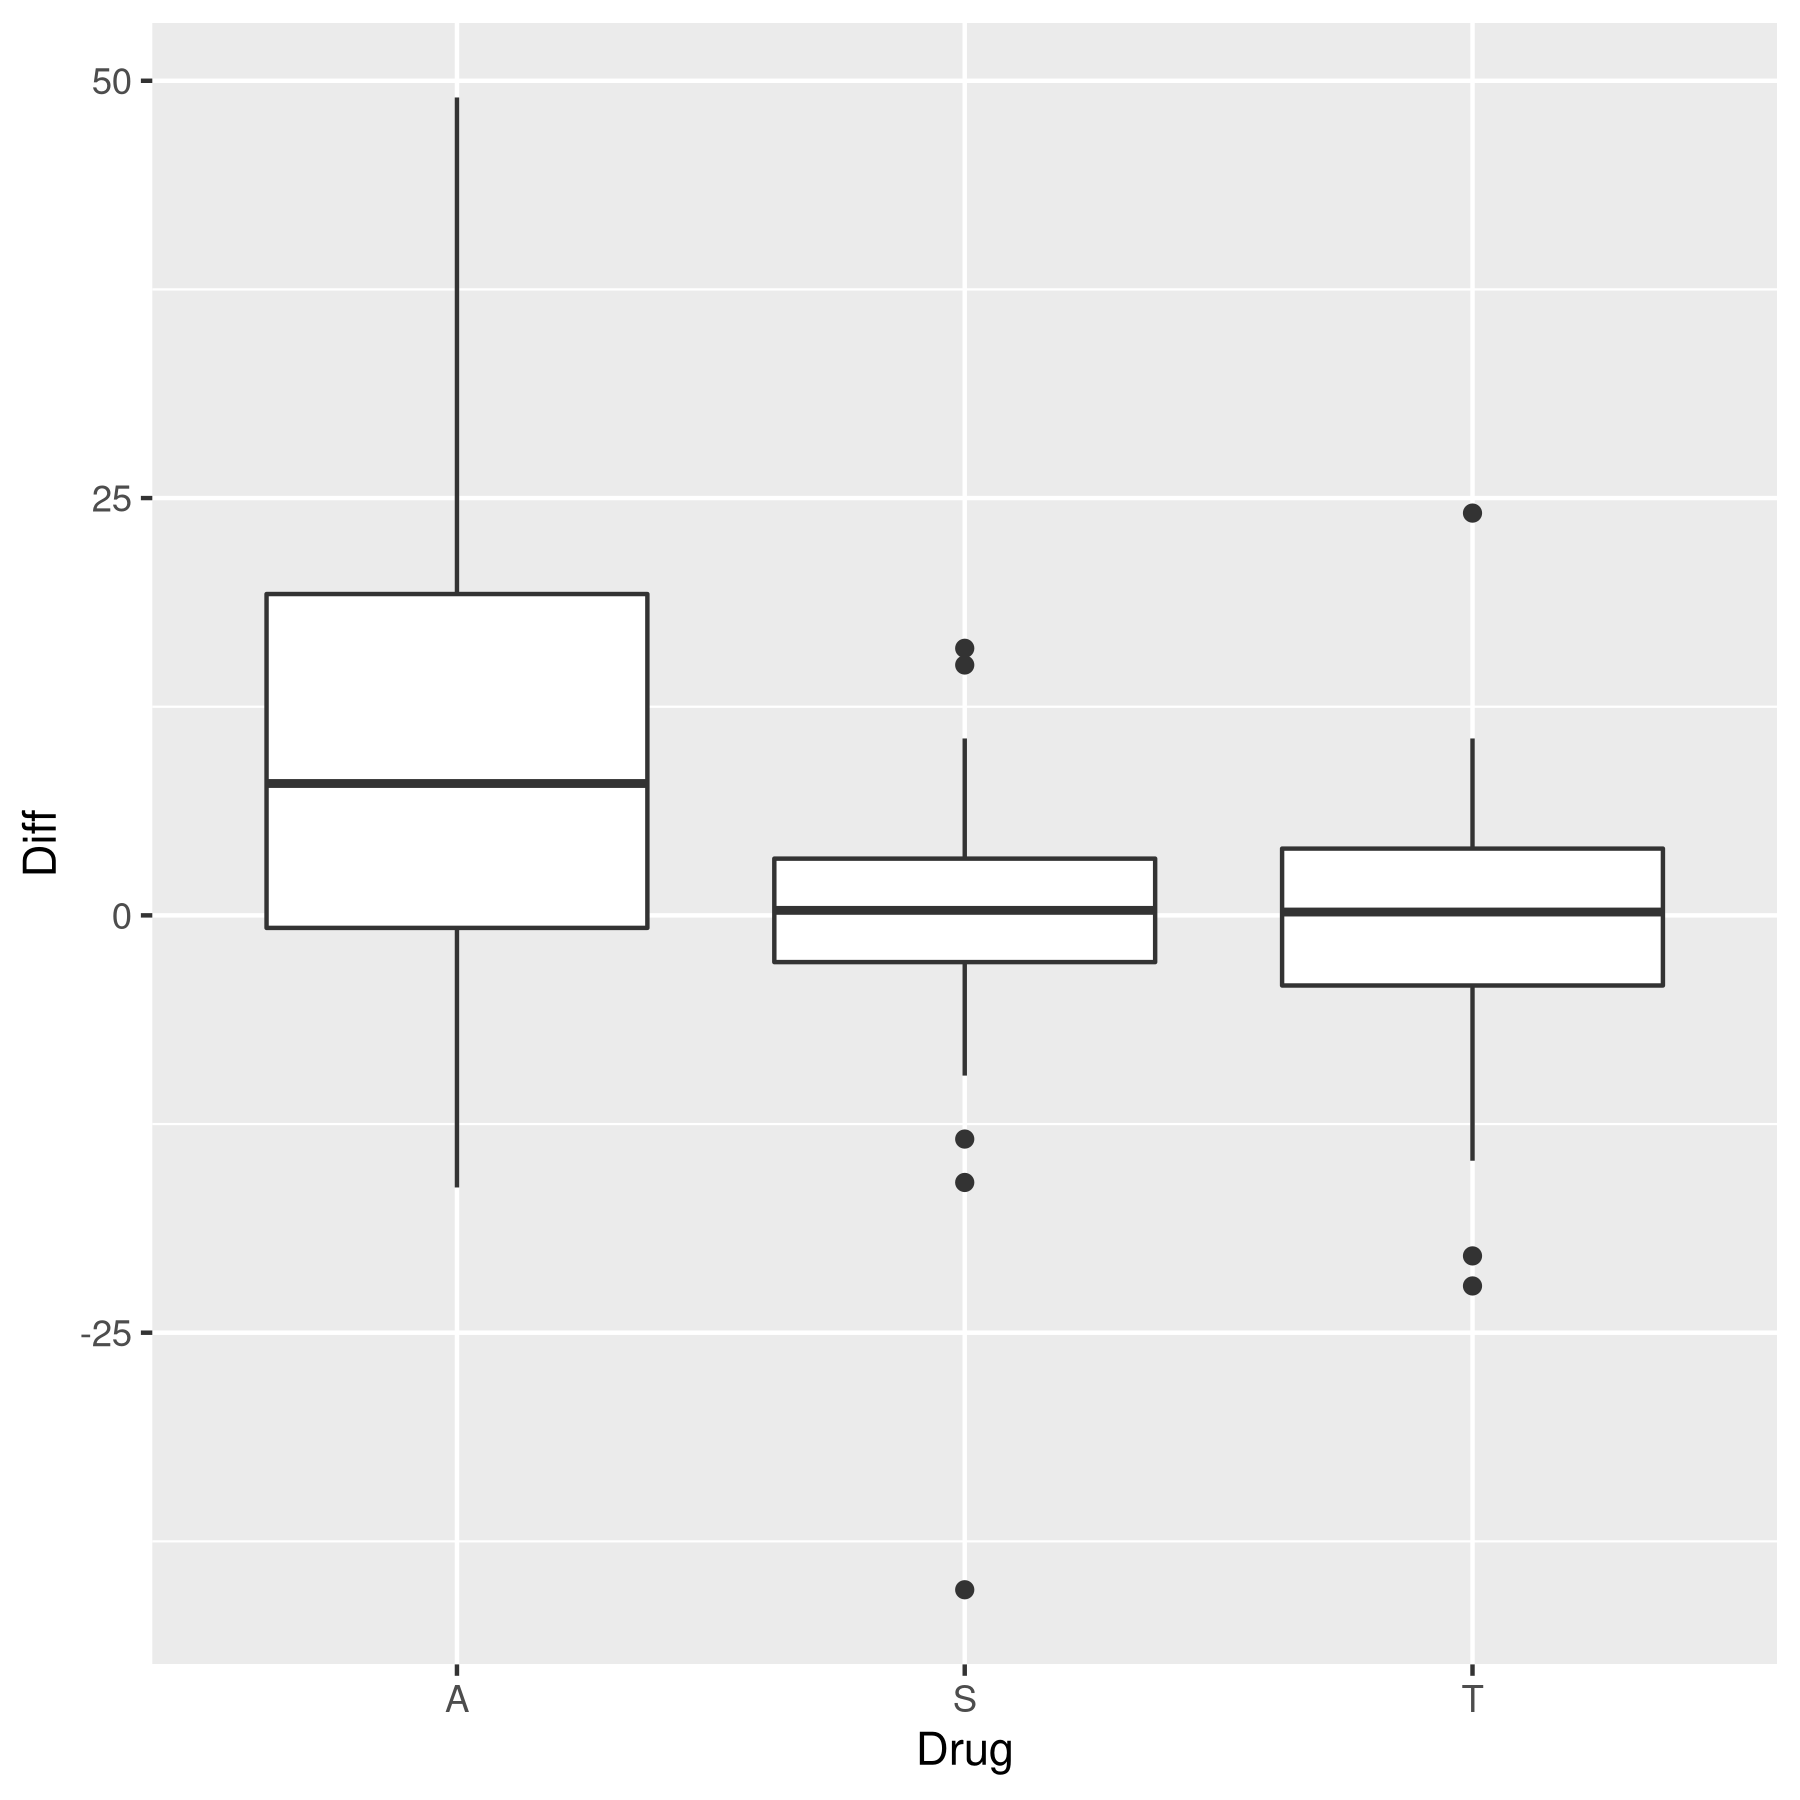

In [45]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)
ggplot(data = df_island, aes( y = Diff, x = Drug)) + geom_boxplot()

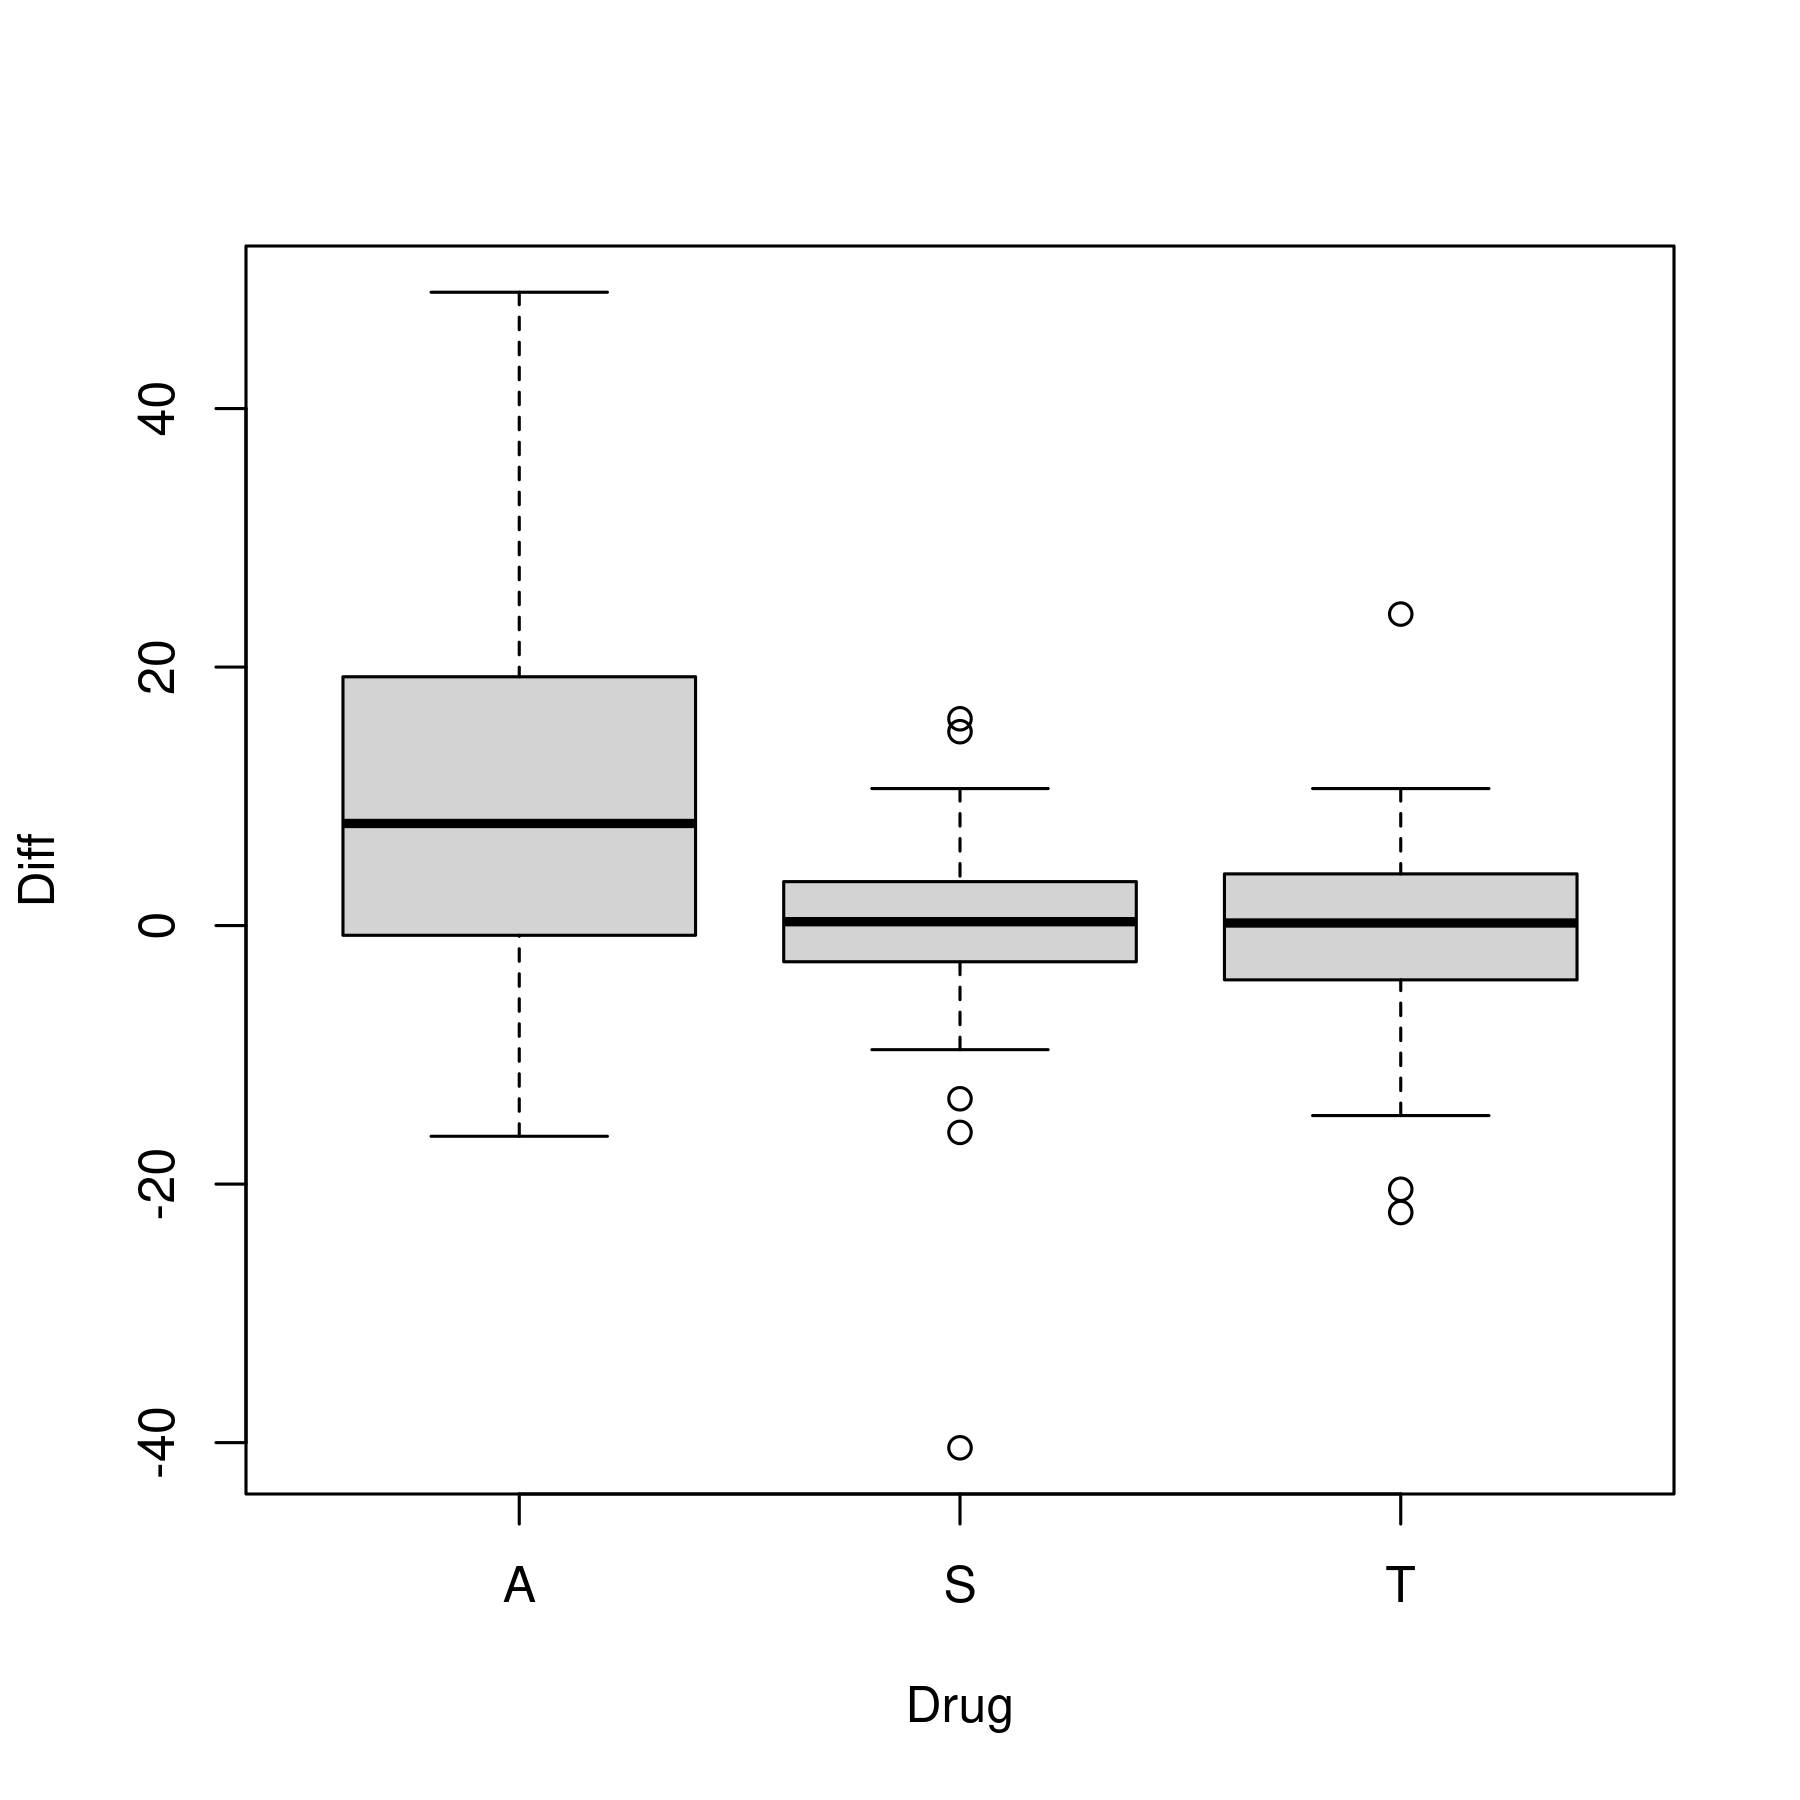

In [44]:
options(repr.plot.width = 6, repr.plot.height = 6, repr.plot.res = 300)
boxplot(Diff ~ Drug, data = df_island)